![Food](Food.jpg)


# What is good food?

## 📖 Background
You and your friend have gotten into a debate about nutrition. Your friend follows a high-protein diet and does not eat any carbohydrates (no grains, no fruits). You claim that a balanced diet should contain all nutrients but should be low in calories. Both of you quickly realize that most of what you know about nutrition comes from mainstream and social media.

Being the data scientist that you are, you offer to look at the data yourself to answer a few key questions.

## 💾 The data

You source nutrition data from USDA's FoodData Central [website](https://fdc.nal.usda.gov/download-datasets.html). This data contains the calorie content of 7,793 common foods, as well as their nutritional composition. Each row represents one food item, and nutritional values are based on a 100g serving. Here is a description of the columns:

- **FDC_ID**: A unique identifier for each food item in the database.
- **Item**: The name or description of the food product.
- **Category**: The category or classification of the food item, such as "Baked Products" or "Vegetables and Vegetable Products".
- **Calories**: The energy content of the food, presented in kilocalories (kcal).
- **Protein**: The protein content of the food, measured in grams.
- **Carbohydrate**: The carbohydrate content of the food, measured in grams.
- **Total fat**: The total fat content of the food, measured in grams.
- **Cholesterol**: The cholesterol content of the food, measured in milligrams.
- **Fiber**: The dietary fiber content of the food, measured in grams.
- **Water**: The water content of the food, measured in grams.
- **Alcohol**: The alcohol content of the food (if any), measured in grams.
- **Vitamin C**: The Vitamin C content of the food, measured in milligrams.

In [5]:
import pandas as pd
df_food = pd.read_csv('nutrition.csv')
df_food

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
0,167512,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",Baked Products,307.0 kcal,5.88 g,41.18 g,13.24 g,0.0 mg,1.2 g,35.5 g,NaN,NaN
1,167513,"Pillsbury, Cinnamon Rolls with Icing, refriger...",Baked Products,330.0 kcal,4.34 g,53.42 g,11.27 g,0.0 mg,1.4 g,27.86 g,NaN,0.1 mg
2,167514,"Kraft Foods, Shake N Bake Original Recipe, Coa...",Baked Products,377.0 kcal,6.1 g,79.8 g,3.7 g,NaN,NaN,3.2 g,NaN,NaN
3,167515,"George Weston Bakeries, Thomas English Muffins",Baked Products,232.0 kcal,8.0 g,46.0 g,1.8 g,NaN,NaN,42.6 g,NaN,NaN
4,167516,"Waffles, buttermilk, frozen, ready-to-heat",Baked Products,273.0 kcal,6.58 g,41.05 g,9.22 g,15.0 mg,2.2 g,40.34 g,0.0 g,0.0 mg
...,...,...,...,...,...,...,...,...,...,...,...,...
7788,175300,"Game meat, buffalo, water, cooked, roasted","Lamb, Veal, and Game Products",131.0 kcal,26.83 g,0.0 g,1.8 g,61.0 mg,0.0 g,68.81 g,NaN,0.0 mg
7789,175301,"Game meat, elk, raw","Lamb, Veal, and Game Products",111.0 kcal,22.95 g,0.0 g,1.45 g,55.0 mg,0.0 g,74.38 g,NaN,0.0 mg
7790,175302,"Game meat, elk, cooked, roasted","Lamb, Veal, and Game Products",146.0 kcal,30.19 g,0.0 g,1.9 g,73.0 mg,0.0 g,66.28 g,NaN,0.0 mg
7791,175303,"Game meat, goat, raw","Lamb, Veal, and Game Products",109.0 kcal,20.6 g,0.0 g,2.31 g,57.0 mg,0.0 g,75.84 g,NaN,0.0 mg


## Preprocessing

In [6]:
import pandas as pd

def clean_convert_impute(df):
    # Columns to clean and convert
    columns_to_convert = ["Calories", "Protein", "Carbohydrate", "Total fat", 
                          "Cholesterol", "Fiber", "Water", "Alcohol", "Vitamin C"]
    
    # Loop through each column, remove 'kcal', 'g', 'mg', and convert to numeric
    for column in columns_to_convert:
        # Remove 'kcal', 'g', 'mg' from the column values
        df[column] = df[column].str.replace('kcal', '').str.replace('g', '').str.replace('mg', '').str.replace('m', '')
        
        # Convert the column to numeric
        df[column] = pd.to_numeric(df[column], errors='coerce')
    
    # Impute missing values with mean rounded to two decimal places
    for column in columns_to_convert:
        mean_value = round(df[column].mean(), 2)
        df[column].fillna(mean_value, inplace=True)
        
    return df

# Clean, convert, and impute the df_food dataframe
df_food_cleaned = clean_convert_impute(df_food.copy())
df_food_cleaned

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
0,167512,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",Baked Products,307.0,5.88,41.18,13.24,0.00,1.20,35.50,0.18,8.98
1,167513,"Pillsbury, Cinnamon Rolls with Icing, refriger...",Baked Products,330.0,4.34,53.42,11.27,0.00,1.40,27.86,0.18,0.10
2,167514,"Kraft Foods, Shake N Bake Original Recipe, Coa...",Baked Products,377.0,6.10,79.80,3.70,45.05,1.98,3.20,0.18,8.98
3,167515,"George Weston Bakeries, Thomas English Muffins",Baked Products,232.0,8.00,46.00,1.80,45.05,1.98,42.60,0.18,8.98
4,167516,"Waffles, buttermilk, frozen, ready-to-heat",Baked Products,273.0,6.58,41.05,9.22,15.00,2.20,40.34,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
7788,175300,"Game meat, buffalo, water, cooked, roasted","Lamb, Veal, and Game Products",131.0,26.83,0.00,1.80,61.00,0.00,68.81,0.18,0.00
7789,175301,"Game meat, elk, raw","Lamb, Veal, and Game Products",111.0,22.95,0.00,1.45,55.00,0.00,74.38,0.18,0.00
7790,175302,"Game meat, elk, cooked, roasted","Lamb, Veal, and Game Products",146.0,30.19,0.00,1.90,73.00,0.00,66.28,0.18,0.00
7791,175303,"Game meat, goat, raw","Lamb, Veal, and Game Products",109.0,20.60,0.00,2.31,57.00,0.00,75.84,0.18,0.00


## Analysis

**Which fruit has the highest vitamin C content? What are some other sources of vitamin C?**

In [7]:
#df_food_cleaned['Category'].unique()
fruits = df_food_cleaned[df_food_cleaned['Category'] == 'Fruits and Fruit Juices']
fruits_sorted = fruits.sort_values(by='Vitamin C',ascending=False)
display(fruits_sorted)

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
5220,171686,"Acerola, (west indian cherry), raw",Fruits and Fruit Juices,32.0,0.40,7.69,0.30,0.0,1.10,91.41,0.00,1677.6
5221,171687,"Acerola juice, raw",Fruits and Fruit Juices,23.0,0.40,4.80,0.30,0.0,0.30,94.30,0.00,1600.0
5285,173044,"Guavas, common, raw",Fruits and Fruit Juices,68.0,2.55,14.32,0.95,0.0,5.40,80.80,0.00,228.3
5059,168152,"Jujube, Chinese, fresh, dried",Fruits and Fruit Juices,281.0,4.72,72.52,0.50,0.0,6.00,20.19,0.18,217.6
5126,169087,"Litchis, dried",Fruits and Fruit Juices,277.0,3.80,70.70,1.20,0.0,4.60,22.30,0.00,183.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5053,167807,"Cherry juice, tart",Fruits and Fruit Juices,59.0,0.31,13.70,0.54,0.0,1.98,85.18,0.00,0.0
5156,169117,"Peach nectar, canned, with sucralose, without ...",Fruits and Fruit Juices,49.0,0.10,11.61,0.57,0.0,0.10,87.65,0.00,0.0
5209,169942,"Persimmons, japanese, dried",Fruits and Fruit Juices,274.0,1.38,73.43,0.59,0.0,14.50,23.01,0.18,0.0
5012,167766,"Maraschino cherries, canned, drained",Fruits and Fruit Juices,165.0,0.22,41.97,0.21,0.0,3.20,57.27,0.00,0.0


**Finding:**
The fruit with the highest vitamin C content is Acerola (West Indian Cherry), when consumed raw.

In [8]:
food_categories=df_food_cleaned.groupby('Category')['Vitamin C'].mean()
food_categories_sorted = food_categories.sort_values(ascending=False)
display(food_categories_sorted)

Category
Spices and Herbs                       31.320635
Beverages                              30.854262
Fruits and Fruit Juices                30.495155
Baby Foods                             27.407594
Vegetables and Vegetable Products      23.030123
Snacks                                 19.485114
American Indian/Alaska Native Foods    11.135394
Breakfast Cereals                       7.591179
Restaurant Foods                        6.098716
Nut and Seed Products                   5.664672
Sweets                                  5.273911
Sausages and Luncheon Meats             3.570299
Meals, Entrees, and Side Dishes         3.500247
Soups, Sauces, and Gravies              3.018819
Fast Foods                              2.663333
Legumes and Legume Products             2.644759
Lamb, Veal, and Game Products           2.575259
Dairy and Egg Products                  1.893814
Baked Products                          1.548859
Finfish and Shellfish Products          1.511667
Poultry Pro

**Finding:**
Upon examining the mean values of Vitamin C content across different food categories, it is observed that besides fruits, significant sources of Vitamin C include Spices and Herbs, Beverages, Baby Foods, and Vegetables and Vegetable Products.

**Describe the relationship between the calories and water content of a food item.**

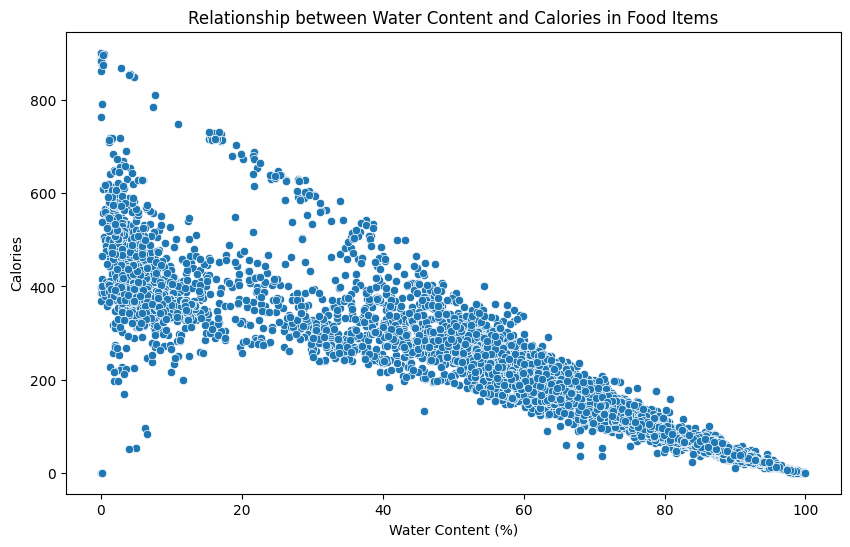

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the relationship between 'Calories' and 'Water' content of food items
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Water', y='Calories', data=df_food_cleaned)
plt.title('Relationship between Water Content and Calories in Food Items')
plt.xlabel('Water Content (%)')
plt.ylabel('Calories')
plt.show()

**Finding:**
There is an inverse relationship between the calorie content and water content in food items, indicating that as the calorie content decreases, the water content increases.

**What are the possible drawbacks of a zero-carb diet?**
According to [Healthline](https://www.healthline.com/nutrition/no-carb-diet#downsides) the drawbacks are:
- Constipation: Since a no-carb diet restricts fruits, most vegetables, beans, and whole grains, it can be very low in fiber, which helps digestion by helping maintain bowel regularity. Because of this, a no-carb diet may leadTrusted Source to constipation.
- Low energy: Carbs are your body’s primary source of energy. Therefore, a no-carb diet may lead to low energy and fatigue.
- Insufficient nutrients: A no-carb diet may not provide enough vitamins and minerals, such as potassium, B vitamins, and vitamin C, which are abundant in fruits, vegetables, and other plant foods. Additionally, the increased urination that results from restricting carbs may leadTrusted Source to nutrient deficiencies such as sodium and potassium over time

**What could be the drawbacks of a very high-protein diet?**
According to [Healthline](https://www.healthline.com/health/too-much-protein#risks) The drawbacks are:
- Weight gain:High-protein diets may tout weight loss, but this type of weight loss may only be short-term.Excess protein consumed is usually stored as fat, while the surplus of amino acids is excreted. This can lead to weight gain over time, especially if you consume too many calories while trying to increase your protein intake.A 2016 study found that weight gain was significantly associated with diets where protein replaced carbohydrates, but not when it replaced fat.

- Bad breath:Eating large amounts of protein can lead to bad breath, especially if you restrict your carbohydrate intake.In an older registry, 40 percent of participants reported bad breath. This could be in part because your body goes into a metabolic state called ketosis, which produces chemicals that give off an unpleasant fruity smell.
Brushing and flossing won’t get rid of the smell. You can double your water intake, brush your teeth more often, and chew gum to counter some of this effect.

- Constipation:In the same study, 44 percent of participants reported constipation. High-protein diets that restrict carbohydrates are typically low in fiber.Increasing your water and fiber intake can help prevent constipation. Tracking your bowel movements may be helpful.

- Diarrhea:Eating too much dairy or processed food, coupled with a lack of fiber, can cause diarrhea. This is especially true if you’re lactose-intolerant or consume protein sources such as fried meat, fish, and poultry. Eat heart-healthy proteins instead.To avoid diarrhea, drink plenty of water, avoid caffeinated beverages, limit fried foods and excess fat consumption, and increase your fiber intake.

- Dehydration:Your body flushes out excess nitrogen with fluids and water. This can leave you dehydrated even though you may not feel more thirsty than usual.A small 2002 study involving athletes found that as protein intake increased, hydration levels decreased. However, a 2006 study concluded that consuming more protein had a minimal impact on hydration.This risk or effect can be minimized by increasing your water intake, especially if you’re an active person. Regardless of protein consumption, it’s always important to drink plenty of water throughout the day.

- Kidney damage:While no major studiesTrusted Source link high protein intake to kidney damage in healthy individuals, excess protein can cause damage in people with preexisting kidney disease.This is because of the excess nitrogen found in the amino acids that make up proteins. Damaged kidneys have to work harder to get rid of the extra nitrogen and waste products of protein metabolism.Separately a 2012 study looked at the effects of low-carbohydrate, high-protein versus low-fat diets on the kidneys.
The study found that in healthy obese adults, a low-carbohydrate, high-protein weight-loss diet over two years was not associated with noticeably harmful effects on renal filtration, albuminuria, or fluid and electrolyte balance compared with a low-fat diet.

- Increased cancer risk:StudiesTrusted Source have shown that certain high-protein diets that are particularly high in red meat-based protein are linked to an increased risk of various health issues, including cancer. Eating more red and/or processed meat is associatedTrusted Source with colorectal, breastTrusted Source, and prostate cancer.
Conversely, eating protein from other sources has been associatedTrusted Source with a decreased risk of cancer. Scientists believe this could be due, in part, to hormones, carcinogenic compounds, and fats found in meat.

- Heart disease:Eating lots of red meat and full-fat dairy foods as part of a high-protein diet may lead to heart disease. This could be related to higher intakes of saturated fat and cholesterol.
According to a 2010 studyTrusted Source, eating large amounts of red meat and high-fat dairy was shown to increase the risk of coronary heart disease in women. Eating poultry, fish, and nuts lowered the risk.
A 2018 study also showed that long-term consumption of red meat can increase trimethylamine N-oxide (TMAO), a gut-generated chemical that is linked to heart disease. Findings also showed that reducing or eliminating dietary red meat reversed the effects.

- Calcium loss:Diets that are high in protein and meat may cause calcium loss. This is sometimes associated with osteoporosis and poor bone health.A 2013 review of studies found an association between high levels of protein consumption and poor bone health. However, another 2013 review found that the effect of protein on bone health is inconclusive. Further research is needed to expand and conclude upon these findings.


## Modelling
According to the Cleveland Clinic [website](https://my.clevelandclinic.org/health/articles/4182-fat-and-calories), a gram of fat has around 9 kilocalories, and a gram of protein and a gram of carbohydrate contain 4 kilocalories each. A linear model will be fit to test whether these estimates agree with the data.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Define the features and target
X = df_food_cleaned[['Protein', 'Carbohydrate', 'Total fat']]
y = df_food_cleaned['Calories']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Standard Scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Transform the test data

# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Fit the model to the scaled training data
linear_reg.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred = linear_reg.predict(X_test_scaled)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Create a DataFrame for prediction for each macronutrient with 1 gram and other variables set to zero
df_predict_protein = pd.DataFrame(scaler.transform([[1, 0, 0]]), columns=['Protein', 'Carbohydrate', 'Total fat'])
df_predict_carbohydrate = pd.DataFrame(scaler.transform([[0, 1, 0]]), columns=['Protein', 'Carbohydrate', 'Total fat'])
df_predict_fat = pd.DataFrame(scaler.transform([[0, 0, 1]]), columns=['Protein', 'Carbohydrate', 'Total fat'])

# Making predictions for each macronutrient
prediction_protein = linear_reg.predict(df_predict_protein)
prediction_carbohydrate = linear_reg.predict(df_predict_carbohydrate)
prediction_fat = linear_reg.predict(df_predict_fat)

# Actual values
actual_protein = 4
actual_carbohydrate = 4
actual_fat = 9

# Calculate the error percentage for each macronutrient
error_protein = prediction_protein[0] - actual_protein
error_carbohydrate = prediction_carbohydrate[0] - actual_carbohydrate
error_fat = prediction_fat[0] - actual_fat

# Display the predictions, error percentages for each macronutrient, and the RMSE
(prediction_protein[0], error_protein), (prediction_carbohydrate[0], error_carbohydrate), (prediction_fat[0], error_fat), rmse

((8.276401838317724, 4.2764018383177245),
 (8.085746683202672, 4.085746683202672),
 (13.086121693338612, 4.086121693338612),
 16.657205296045618)

The linear model exhibits errors of approximately 4.27, 4.09, and 4.09 for the respective variables, with an overall Root Mean Square Error (RMSE) of 16.65.

## Errors of the linear model
According to [Wikipedia](https://en.wikipedia.org/wiki/Food_energy) The main source of calories is protein,carbohydrates and fat. Other sources include water,fibre and Alcohol. Let us include them and see if these other hidden sources wiill improve the predictions.

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Define the features and target, replacing Cholesterol with Alcohol
X = df_food_cleaned[['Protein', 'Carbohydrate', 'Total fat', 'Alcohol', 'Fiber', 'Water']]
y = df_food_cleaned['Calories']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Standard Scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Fit the model to the scaled training data
linear_reg.fit(X_train_scaled, y_train)

# Create a DataFrame for prediction for each macronutrient with 1 gram and other variables set to zero
# Replacing Cholesterol with Alcohol in the prediction DataFrame
df_predict_protein = pd.DataFrame(scaler.transform([[1, 0, 0, 0, 0, 0]]), columns=['Protein', 'Carbohydrate', 'Total fat', 'Alcohol', 'Fiber', 'Water'])
df_predict_carbohydrate = pd.DataFrame(scaler.transform([[0, 1, 0, 0, 0, 0]]), columns=['Protein', 'Carbohydrate', 'Total fat', 'Alcohol', 'Fiber', 'Water'])
df_predict_fat = pd.DataFrame(scaler.transform([[0, 0, 1, 0, 0, 0]]), columns=['Protein', 'Carbohydrate', 'Total fat', 'Alcohol', 'Fiber', 'Water'])

# Making predictions for each macronutrient
prediction_protein = linear_reg.predict(df_predict_protein)
prediction_carbohydrate = linear_reg.predict(df_predict_carbohydrate)
prediction_fat = linear_reg.predict(df_predict_fat)

print(prediction_protein[0], prediction_carbohydrate[0], prediction_fat[0])

# Predict on the testing set
y_pred = linear_reg.predict(scaler.transform(X_test))

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error
rmse = np.sqrt(mse)
# Display RMSE 
rmse

-16.954580324991895 -17.144794813682893 -12.269546968103043


10.526032295256224

**Finding:**
Although the predictions have become negative, there has been a reduction in the Root Mean Square Error (RMSE).

### Polynomial Regression

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import pandas as pd
import numpy as np

# Define the features and target, removing 'Alcohol', 'Fiber', 'Water'
X = df_food_cleaned[['Protein', 'Carbohydrate', 'Total fat']]
y = df_food_cleaned['Calories']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Standard Scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Polynomial Features
poly = PolynomialFeatures(degree=2)

# Transform the scaled training and testing data to include polynomial features
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Fit the model to the polynomial training data
linear_reg.fit(X_train_poly, y_train)

# Create a DataFrame for prediction for each macronutrient with 1 gram and other variables set to zero
df_predict_protein = pd.DataFrame(scaler.transform([[1, 0, 0]]), columns=['Protein', 'Carbohydrate', 'Total fat'])
df_predict_carbohydrate = pd.DataFrame(scaler.transform([[0, 1, 0]]), columns=['Protein', 'Carbohydrate', 'Total fat'])
df_predict_fat = pd.DataFrame(scaler.transform([[0, 0, 1]]), columns=['Protein', 'Carbohydrate', 'Total fat'])

# Transform the prediction DataFrames to include polynomial features
df_predict_protein_poly = poly.transform(df_predict_protein)
df_predict_carbohydrate_poly = poly.transform(df_predict_carbohydrate)
df_predict_fat_poly = poly.transform(df_predict_fat)

# Making predictions for each macronutrient
prediction_protein = linear_reg.predict(df_predict_protein_poly)
prediction_carbohydrate = linear_reg.predict(df_predict_carbohydrate_poly)
prediction_fat = linear_reg.predict(df_predict_fat_poly)

print(prediction_protein[0], prediction_carbohydrate[0], prediction_fat[0])

# Predict on the polynomial testing set
y_pred = linear_reg.predict(X_test_poly)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error
rmse = np.sqrt(mse)
# Display RMSE 
rmse

6.346423318814885 5.945086309641681 11.625343479168777


16.413966965932126

**Finding:**
The predictions have improved, evidenced by a decrease in the Root Mean Square Error (RMSE), and the elimination of negative values.